In [1]:
%load_ext autoreload
%autoreload 2
from models import *
import os

**The flowchart belows explains the current data storage hierarchy**\
\
**Current transient types and subtypes supports are:**\
**Type** [hard purple boxes]: FBOT, SESNe, SLSN-1, SLSN-2, SNII, SNIIn, Other\
**Subtype** [soft blue boxes]: SNIbn, SNICn, SNIIb, SLSN-1, SLSN-2, SNIIP, SNII-pec, SNII, SNIIn, SNIa, SNIa-pec

```mermaid
flowchart TD;
    A{Data};
    subgraph z[" "];
    A-->B[FBOT]
    A-->C[SESNe];
    A-->D[SLSN-1];
    A-->E[SLSN-2];
    A-->F[SNII];
    A-->G[SNIIn];
    A-->a[Other];
    end;
    subgraph y[" "];
    B-->H(SNIbn);
    B-->I(SNIcn);
    C-->J(SNIIb);
    D-->K(SLSN-1);
    E-->L(SLSN-2);
    F-->M(SNIIP);
    F-->N(SNII-pec);
    F-->O(SNII);
    G-->P(SNIIn);
    a-->Q(SNIa);
    a-->R(SNIa-pec);
    end;
    S{Data}-->T[Type]-->U(Subtype);

    style H fill:#e0f8f8,stroke:#2E86C1
    style I fill:#e0f8f8,stroke:#2E86C1
    style J fill:#e0f8f8,stroke:#2E86C1
    style K fill:#e0f8f8,stroke:#2E86C1
    style L fill:#e0f8f8,stroke:#2E86C1
    style M fill:#e0f8f8,stroke:#2E86C1
    style N fill:#e0f8f8,stroke:#2E86C1
    style O fill:#e0f8f8,stroke:#2E86C1
    style P fill:#e0f8f8,stroke:#2E86C1
    style Q fill:#e0f8f8,stroke:#2E86C1
    style R fill:#e0f8f8,stroke:#2E86C1
    style U fill:#e0f8f8,stroke:#2E86C1
    style A fill:#daf7a6,stroke:#1E8449
    style S fill:#daf7a6,stroke:#1E8449
```

plots to show:\
-**SN**\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;~~-plot_data (unshifted data, or shifted if previously done)~~\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;~~-fit_for_max (data and fit)~~\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;~~-shift_to_max, "normalized" shifted to fitted peak~~\
\
-**SNCollection**\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-~~plot_all_lcs, (log and ~~not log~~)~~\
\
-**GP**\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-predict_gp (shows mean and error)\
\
-**GP3D**\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-process_dataset_for_gp_3d (plots surface of phase, wavelength, filter)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-(run_gp), calls process_dataset_for_gp_3d\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-predict_gp, calls run_gp which calls process_dataset_for_gp_3d AND shows bestfit/error for each filter \

In [32]:
#create a list of objects matching a type and/or subtype OR by specific names
caat = CAAT()
caat.get_sne_by_type("SNII", "SNIIP")

array(['SN2021yyg', 'SN2011gv', 'SN2022ewj', 'SN2009N', 'SN2020dpw',
       'SN2011cj', 'SN2009lq', 'SN2020uem', 'SN2009lm', 'SN2010hq',
       'SN2020sje', 'SN2010bj', 'SN1987A', 'SN2009ll', 'SN2022fuc',
       'SN2020esm', 'SN2011dh', 'SN2018imf', 'SN2011hj', 'SN2013fs',
       'SN2021yja', 'SN2004dj', 'SN2011ja', 'SN2020aavm', 'SN2016L',
       'SN2016B', 'SN2018cxn', 'SN2016X', 'SN2017ivu'], dtype=object)

In [88]:
# SINGLE OBJECT PLOTS

sn = SN(name='SN2020ikq') #instantiate SN class for single object

In [110]:
# qt for interactive plotting (i.e. to zoom in) or inline for static plotting
%matplotlib qt
sn.plot_data() #plots all forced photometry data, not necessarily centered on SN explosion MJD

In [35]:
sn.fit_for_max(filt='r', plot=True)
# currently only does 1 filter @ a time
# DO WE WANT TO CHANGE TO MULT FILTER @ ONCE?

(58971.92581717629, 18.5269913316052)

In [40]:
sn.shift_to_max(filt='r', plot=True)
# currently only does 1 filter @ a time
# DO WE WANT TO CHANGE TO MULT FILTER @ ONCE?

(array([-3.55504168, -0.70812038,  2.32522452,  5.33888192,  5.33935642,
         6.36380092,  6.36427542,  8.32581472, 19.32152082, 22.36274762,
        25.32909022, 32.32640502, 37.27659022, 40.30133562, 43.29338422,
        52.29021292, 55.33150922, 61.24934482, 66.26826842, 67.28834952,
        68.27648602, 69.32117352, 70.28862722, 71.31369672]),
 array([0.23205024, 0.00744297, 0.06817271, 0.25061208, 0.36825729,
        0.31895048, 0.40366593, 0.44824449, 0.41901093, 0.4431803 ,
        0.63743404, 0.90798142, 1.49555826, 1.3766112 , 1.57292786,
        1.97566446, 1.95385304, 2.13641253, 2.3149438 , 2.29359328,
        2.16104845, 2.49551079, 1.91409612, 2.59928348]),
 array([0.02956287, 0.0363948 , 0.06032204, 0.07652323, 0.07727413,
        0.04915135, 0.05476538, 0.03067958, 0.03344289, 0.03609616,
        0.03840833, 0.11065263, 0.12674618, 0.07551079, 0.09913061,
        0.23799021, 0.23058247, 0.31306218, 0.18478967, 0.15580498,
        0.1652656 , 0.26566584, 0.12960602, 

In [2]:
# MULTIPLE OBJECT PLOTS

IIb = SNCollection(sntype="SESNe",snsubtype="SNIIb")
IIb.sne

Loading SN Type: SESNe, Subtype: SNIIb
['SN2020jfv' 'SN2022eji' 'SN2009mg' 'SN2019gaf' 'SN2019hte' 'SN2023aew'
 'SN2022ngb' 'SN2020ikq' 'SN2022hnt' 'SN2020fqv' 'SN2011hs' 'SN2011cb'
 'SN2021pb' 'SN2016gkg' 'SN2019rn' 'SN2020acat' 'SN2019wxt' 'SN2020rsc'
 'SN2022qzr' 'SN2020sbw' 'SN2009mk' 'SN2021bxu' 'SN2009gj' 'SN2017ati'
 'SN2021ybc' 'SN2016bmd' 'SN2006T' 'SN2020xlt' 'SN2021sjt' 'SN2023mut'
 'SN2021uqw']


[SN2020jfv,
 SN2022eji,
 SN2009mg,
 SN2019gaf,
 SN2019hte,
 SN2023aew,
 SN2022ngb,
 SN2020ikq,
 SN2022hnt,
 SN2020fqv,
 SN2011hs,
 SN2011cb,
 SN2021pb,
 SN2016gkg,
 SN2019rn,
 SN2020acat,
 SN2019wxt,
 SN2020rsc,
 SN2022qzr,
 SN2020sbw,
 SN2009mk,
 SN2021bxu,
 SN2009gj,
 SN2017ati,
 SN2021ybc,
 SN2016bmd,
 SN2006T,
 SN2020xlt,
 SN2021sjt,
 SN2023mut,
 SN2021uqw]

Plotting all 31 lightcurves in the collection
Reached last filter and could not fit for peak


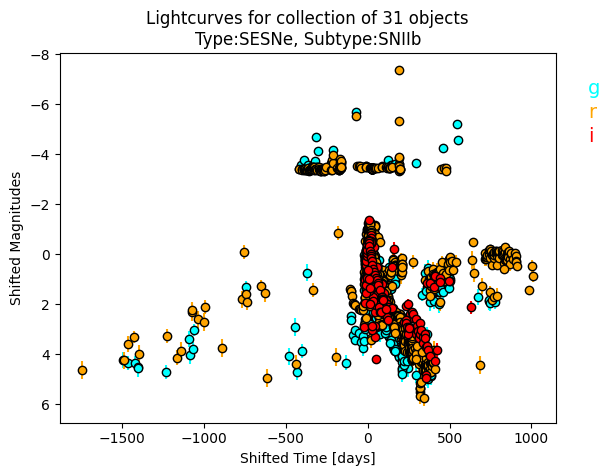

In [16]:
%matplotlib inline
# filts can take list of single or mulitple personally defined filters to plot
IIb.plot_all_lcs(filts=['g','r', 'i'])

Plotting all 31 lightcurves in the collection
BEWARE -- plotting ALL bands of ALL objects in the collection -- plot will be messy.

Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak


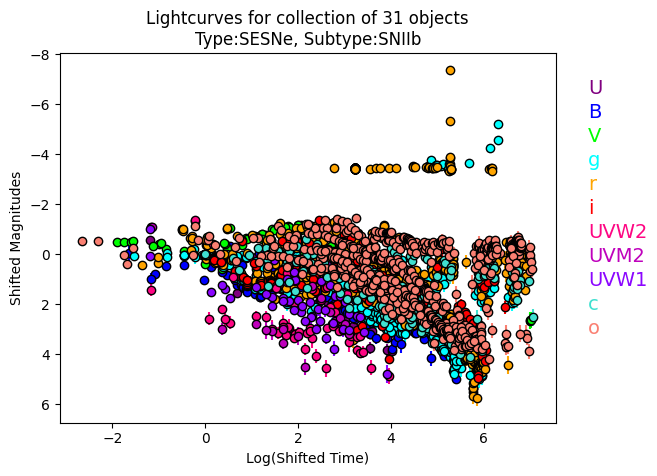

In [19]:
# filts default is all filters
# can also show log_transform
IIb.plot_all_lcs(log_transform=True)

In [ ]:
kernel = RBFKernel([np.log(10.0), 500.0], (0.1, 2.0e3)).kernel + WhiteNoiseKernel(1., (1e-10, 10.)).kernel
gp = GP3D(IIP, kernel)

Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last filter and could not fit for peak
Reached last 

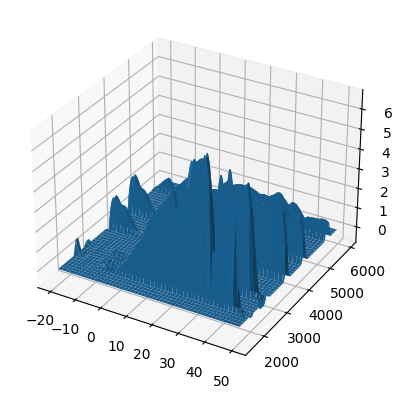

AttributeError: 'GP3D' object has no attribute 'type'

In [6]:
gp.predict_gp(['UVW2', 'UVM2', 'UVW1', 'U', 'B', 'V'], -20, 50, 0.9, plot=True, log_transform=30)